In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib widget

In [2]:
# importing data
HighVol = np.loadtxt('High_Voltage.txt',delimiter=',')
LowVol = np.loadtxt('Low_Voltage.txt',delimiter=',')

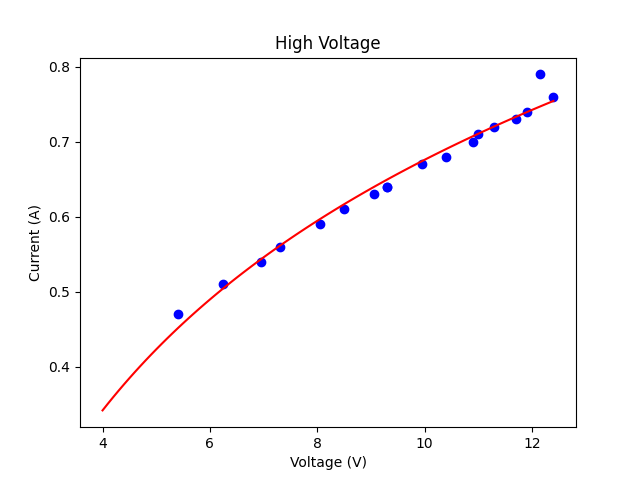

In [13]:
# Plotting High Voltage Curve data

def f(x,a,b):
    return a*np.log(x)+b

plt.clf()
plt.plot(HighVol[:,0],HighVol[:,1],'bo')

popt, pcov = curve_fit(f,HighVol[:,0],HighVol[:,1])

xFit = np.arange(4.0,12.5,0.1)


plt.plot(xFit,f(xFit,*popt),'r-')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('High Voltage')
plt.show()

In [4]:
# Calculating Resistance

Res = []
for i in range(len(HighVol)):
    Res.append(HighVol[i,0]/HighVol[i,1])

# Calculating Resistance at room temperature
Ro = 2 #ohm
So = 5.6 * 10**(-8) #ohm-m
alph = 0.0045 # C
k = Ro/So

# Calculating Resistivity for every Resistance

Resis = []
for i in Res:
    Resis.append(i/k)

def temp(r):
    return ((1/alph)*((r/So)*(1+20*alph)-1)) + 273

# Storing Temperature
Temp = []
for i in Resis:
    Temp.append(temp(i))

print("Temperatures:")
print(Temp)

# X = np.arange(0,10,0.1)

# plt.clf()
# plt.plot(X,temp(X*10**(-8)),'r-') # Temperature increases Linearly with Resistivity
# plt.show()


Temperatures:
[1609.5226337448562, 1703.2259887005653, 1790.5485008818343, 1849.3681592039798, 1927.1471048513306, 1442.2671394799058, 2026.8011695906437, 1738.391621129326, 1810.6736111111113, 1810.6736111111113, 1629.5476190476193, 1534.9825708061003, 1903.0653594771243, 1936.650793650794, 1951.5493827160499, 1991.873668188737, 1998.3753753753754, 1913.4360056258793]


In [5]:
# Finding whats the lowest Voltage we can take as per 
# our restrictions for room Temperature USING V/I PLOT
# which is the intersection of x/y = Ro and V/I Plot
# comes out to be 4.477V

lowVol = 4.477 #V


# Thus we remove the negative Values from Temperature data



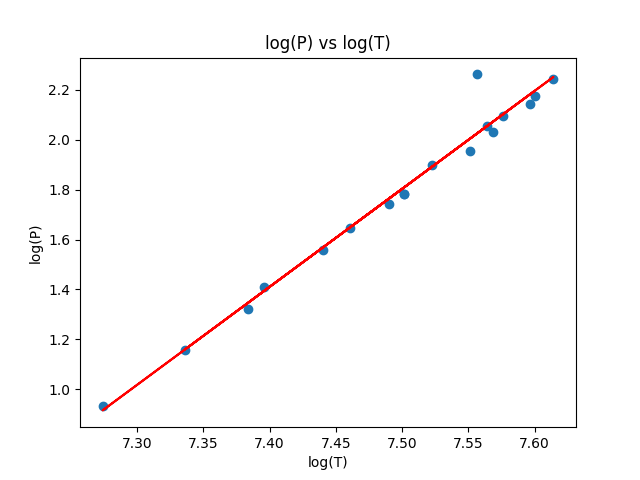

Slope:  3.926515627580311   Intercept:  -27.645983297109954


In [6]:
# Calculating Power and plotting log(P) vs log(T)

Pow = []
for i in range(len(HighVol)):
    Pow.append(HighVol[i,0]*HighVol[i,1])

lPow = np.log(Pow)
lTemp = np.log(Temp)

# Polyfit to a line
aFit, bFit = np.polyfit(lTemp,lPow,1)

plt.clf()
plt.scatter(lTemp,lPow)
plt.plot(lTemp,aFit*lTemp+bFit,'r-')
plt.xlabel('log(T)')
plt.ylabel('log(P)')
plt.title('log(P) vs log(T)')
plt.show()

slope, intercept = np.polyfit(lTemp,lPow,1)
print("Slope: ",slope, "  Intercept: ",intercept)
# print(lTemp)
# print(lPow)


In [7]:
# Calculating Stephens Constant

eA = np.exp(intercept)

Cross_Ar = (0.01)/k

def Ar(r,l):
    return 2*np.pi*r*(r+l)

print("Stephens Constant: ", Ar(np.sqrt(Cross_Ar/np.pi),0.01*0.1))



Stephens Constant:  5.987765143716132e-08


In [8]:
# Data to Note down
# print(Res) ## Resistance
# print(Resis) ## Resistivity
print(Temp) ## Temperature
# print(Pow) ## Power
#v print(Cross_Ar)
# print(Ar(np.sqrt(Cross_Ar/np.pi),0.01*0.1))


[1609.5226337448562, 1703.2259887005653, 1790.5485008818343, 1849.3681592039798, 1927.1471048513306, 1442.2671394799058, 2026.8011695906437, 1738.391621129326, 1810.6736111111113, 1810.6736111111113, 1629.5476190476193, 1534.9825708061003, 1903.0653594771243, 1936.650793650794, 1951.5493827160499, 1991.873668188737, 1998.3753753753754, 1913.4360056258793]
